## Predicting Academic Performance 

Given *data about students' performance in school*, let's try to predict whether a given student will have a **high, medium or low grade**.

We will use a TensorFlow ANN to make our predictions.

Data source: https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
data = pd.read_csv('archive/xAPI-Edu-Data.csv')
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

### Preprocessing

In [4]:
df = data.copy()

In [5]:
df.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

### Encoding

In [6]:
def get_uniques(df, columns):
    return {column: list(df[column].unique()) for column in columns}

def get_categorical_columns(df):
    return [column for column in df.columns if df.dtypes[column]=='object']

In [7]:
get_uniques(df, get_categorical_columns(df))

{'gender': ['M', 'F'],
 'NationalITy': ['KW',
  'lebanon',
  'Egypt',
  'SaudiArabia',
  'USA',
  'Jordan',
  'venzuela',
  'Iran',
  'Tunis',
  'Morocco',
  'Syria',
  'Palestine',
  'Iraq',
  'Lybia'],
 'PlaceofBirth': ['KuwaIT',
  'lebanon',
  'Egypt',
  'SaudiArabia',
  'USA',
  'Jordan',
  'venzuela',
  'Iran',
  'Tunis',
  'Morocco',
  'Syria',
  'Iraq',
  'Palestine',
  'Lybia'],
 'StageID': ['lowerlevel', 'MiddleSchool', 'HighSchool'],
 'GradeID': ['G-04',
  'G-07',
  'G-08',
  'G-06',
  'G-05',
  'G-09',
  'G-12',
  'G-11',
  'G-10',
  'G-02'],
 'SectionID': ['A', 'B', 'C'],
 'Topic': ['IT',
  'Math',
  'Arabic',
  'Science',
  'English',
  'Quran',
  'Spanish',
  'French',
  'History',
  'Biology',
  'Chemistry',
  'Geology'],
 'Semester': ['F', 'S'],
 'Relation': ['Father', 'Mum'],
 'ParentAnsweringSurvey': ['Yes', 'No'],
 'ParentschoolSatisfaction': ['Good', 'Bad'],
 'StudentAbsenceDays': ['Under-7', 'Above-7'],
 'Class': ['M', 'L', 'H']}

In [8]:
binary_features = ['gender', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']

ordinal_features = ['StageID', 'GradeID']

nominal_features = ['NationalITy', 'PlaceofBirth', 'SectionID', 'Topic']

target_column = 'Class'

In [9]:
binary_positive_values = ['M', 'S', 'Father', 'Yes', 'Good', 'Above-7']

stage_ordering = ['lowerlevel', 'MiddleSchool', 'HighSchool']

grade_ordering = [
  'G-02',
  'G-04',
  'G-05',
  'G-06',
  'G-07',
  'G-08',
  'G-09',
  'G-10',
  'G-11',
  'G-12'
]

nominal_prefixes = ['N', 'POB', 'S', 'T']

In [10]:
def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def nominal_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix, dtype=int)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [11]:
for column, positive_value in zip(binary_features, binary_positive_values):
    df = binary_encode(df, column, positive_value)

In [12]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,KW,KuwaIT,lowerlevel,G-04,A,IT,0,1,15,16,2,20,1,1,0,M
1,1,KW,KuwaIT,lowerlevel,G-04,A,IT,0,1,20,20,3,25,1,1,0,M
2,1,KW,KuwaIT,lowerlevel,G-04,A,IT,0,1,10,7,0,30,0,0,1,L
3,1,KW,KuwaIT,lowerlevel,G-04,A,IT,0,1,30,25,5,35,0,0,1,L
4,1,KW,KuwaIT,lowerlevel,G-04,A,IT,0,1,40,50,12,50,0,0,1,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,1,1,5,4,5,8,0,0,1,L
476,0,Jordan,Jordan,MiddleSchool,G-08,A,Geology,0,1,50,77,14,28,0,0,0,M
477,0,Jordan,Jordan,MiddleSchool,G-08,A,Geology,1,1,55,74,25,29,0,0,0,M
478,0,Jordan,Jordan,MiddleSchool,G-08,A,History,0,1,30,17,14,57,0,0,1,L


In [13]:
df = ordinal_encode(df, 'StageID', stage_ordering)
df = ordinal_encode(df, 'GradeID', grade_ordering)

In [14]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,KW,KuwaIT,0,1,A,IT,0,1,15,16,2,20,1,1,0,M
1,1,KW,KuwaIT,0,1,A,IT,0,1,20,20,3,25,1,1,0,M
2,1,KW,KuwaIT,0,1,A,IT,0,1,10,7,0,30,0,0,1,L
3,1,KW,KuwaIT,0,1,A,IT,0,1,30,25,5,35,0,0,1,L
4,1,KW,KuwaIT,0,1,A,IT,0,1,40,50,12,50,0,0,1,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,Jordan,Jordan,1,5,A,Chemistry,1,1,5,4,5,8,0,0,1,L
476,0,Jordan,Jordan,1,5,A,Geology,0,1,50,77,14,28,0,0,0,M
477,0,Jordan,Jordan,1,5,A,Geology,1,1,55,74,25,29,0,0,0,M
478,0,Jordan,Jordan,1,5,A,History,0,1,30,17,14,57,0,0,1,L


In [15]:
df['StageID'].unique()

array([0, 1, 2])

In [16]:
df['GradeID'].unique()

array([1, 4, 5, 3, 2, 6, 9, 8, 7, 0])

In [17]:
for column, prefix in zip(nominal_features, nominal_prefixes):
    df = nominal_encode(df, column, prefix)

In [18]:
df

,gender,StageID,GradeID,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,...,T_Chemistry,T_English,T_French,T_Geology,T_History,T_IT,T_Math,T_Quran,T_Science,T_Spanish
0,1,0,1,0,1,15,16,2,20,1,...,0,0,0,0,0,1,0,0,0,0
1,1,0,1,0,1,20,20,3,25,1,...,0,0,0,0,0,1,0,0,0,0
2,1,0,1,0,1,10,7,0,30,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,1,30,25,5,35,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,1,40,50,12,50,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,1,5,1,1,5,4,5,8,0,...,1,0,0,0,0,0,0,0,0,0
476,0,1,5,0,1,50,77,14,28,0,...,0,0,0,1,0,0,0,0,0,0
477,0,1,5,1,1,55,74,25,29,0,...,0,0,0,1,0,0,0,0,0,0
478,0,1,5,0,1,30,17,14,57,0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
# for index, name in enumerate(label_encoder.classes_):
#     print(f"{name}: {index}")
target_ordering = ['L', 'M', 'H']
df = ordinal_encode(df, 'Class', target_ordering)

### Splitting and Scaling

In [20]:
y = df[target_column]
X = df.drop(target_column, axis=1)

In [21]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,gender,StageID,GradeID,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,...,T_Chemistry,T_English,T_French,T_Geology,T_History,T_IT,T_Math,T_Quran,T_Science,T_Spanish
0,0.757476,-1.084669,-0.774364,-0.979379,0.834334,-1.033429,-1.174075,-1.351167,-0.843326,0.881917,...,-0.229416,-0.321634,-0.395761,-0.229416,-0.203014,2.013115,-0.213896,-0.219169,-0.344791,-0.234404
1,0.757476,-1.084669,-0.774364,-0.979379,0.834334,-0.870813,-1.053029,-1.313549,-0.662225,0.881917,...,-0.229416,-0.321634,-0.395761,-0.229416,-0.203014,2.013115,-0.213896,-0.219169,-0.344791,-0.234404
2,0.757476,-1.084669,-0.774364,-0.979379,0.834334,-1.196046,-1.446426,-1.426401,-0.481125,-1.133893,...,-0.229416,-0.321634,-0.395761,-0.229416,-0.203014,2.013115,-0.213896,-0.219169,-0.344791,-0.234404
3,0.757476,-1.084669,-0.774364,-0.979379,0.834334,-0.545579,-0.901723,-1.238315,-0.300024,-1.133893,...,-0.229416,-0.321634,-0.395761,-0.229416,-0.203014,2.013115,-0.213896,-0.219169,-0.344791,-0.234404
4,0.757476,-1.084669,-0.774364,-0.979379,0.834334,-0.220346,-0.145191,-0.974994,0.243279,-1.133893,...,-0.229416,-0.321634,-0.395761,-0.229416,-0.203014,2.013115,-0.213896,-0.219169,-0.344791,-0.234404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-1.320173,0.573424,0.850531,1.021055,0.834334,-1.358663,-1.537210,-1.238315,-1.277968,-1.133893,...,4.358899,-0.321634,-0.395761,-0.229416,-0.203014,-0.496743,-0.213896,-0.219169,-0.344791,-0.234404
476,-1.320173,0.573424,0.850531,-0.979379,0.834334,0.104888,0.671863,-0.899759,-0.553565,-1.133893,...,-0.229416,-0.321634,-0.395761,4.358899,-0.203014,-0.496743,-0.213896,-0.219169,-0.344791,-0.234404
477,-1.320173,0.573424,0.850531,1.021055,0.834334,0.267505,0.581080,-0.485969,-0.517345,-1.133893,...,-0.229416,-0.321634,-0.395761,4.358899,-0.203014,-0.496743,-0.213896,-0.219169,-0.344791,-0.234404
478,-1.320173,0.573424,0.850531,-0.979379,0.834334,-0.545579,-1.143813,-0.899759,0.496820,-1.133893,...,-0.229416,-0.321634,-0.395761,-0.229416,4.925765,-0.496743,-0.213896,-0.219169,-0.344791,-0.234404


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)

### Training

In [23]:
X.shape

(480, 55)

In [26]:
inputs = tf.keras.Input(shape=(55,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

batch_size = 64
epochs = 100

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.2410 - loss: 1.2621 - val_accuracy: 0.3117 - val_loss: 1.1521 - learning_rate: 0.0010
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4332 - loss: 1.1056 - val_accuracy: 0.4156 - val_loss: 1.0637 - learning_rate: 0.0010
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5700 - loss: 0.9941 - val_accuracy: 0.4805 - val_loss: 0.9921 - learning_rate: 0.0010
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6156 - loss: 0.9090 - val_accuracy: 0.4935 - val_loss: 0.9354 - learning_rate: 0.0010
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6743 - loss: 0.8398 - val_accuracy: 0.5065 - val_loss: 0.8887 - learning_rate: 0.0010
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7166 - loss: 0.7771 - val_accuracy: 0.5844 - val_loss: 0.8479 - learning_rate: 0.0010
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7296 - loss: 0.7305 - val_accuracy: 

### Results

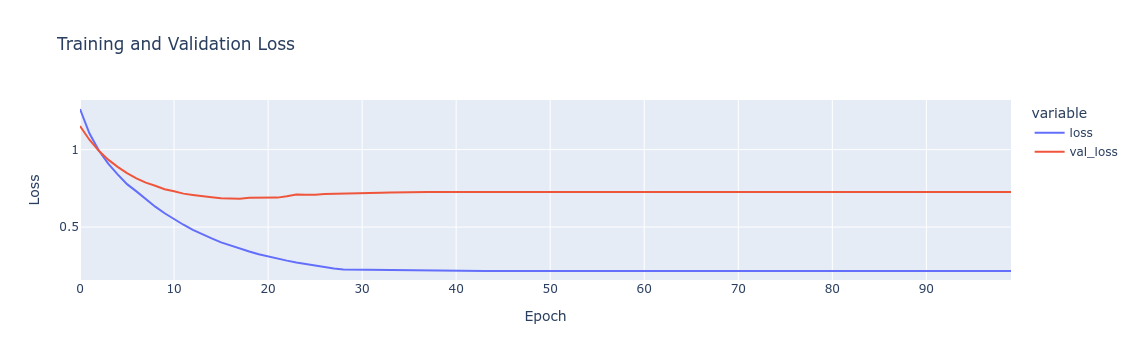

In [27]:
fig = px.line(
    history.history,
    y = ['loss', 'val_loss'],
    labels = {'index': 'Epoch', 'value': 'Loss'},
    title = "Training and Validation Loss"
)

fig.show()

In [28]:
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6771 - loss: 0.7722


[0.7721534371376038, 0.6770833134651184]